# Author: Himanshu Hemant Paithane

# Notebook 9: Model Comparison and Final Analysis for Smoking Prediction

In this notebook, we'll compare all the classification models we've trained in the previous notebooks to determine which one performs best for smoking prediction based on health indicators. We'll also assess whether the reduced feature set provides sufficient performance compared to the full feature set.

## Objectives:
1. Import results from all previously trained models (KNN, Decision Tree, Random Forest, SVM, Naive Bayes, Logistic Regression, Neural Network)
2. Compare models based on various metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC)
3. Analyze the trade-off between full and reduced feature sets
4. Determine the best overall model(s) for smoking prediction
5. Provide recommendations for real-world implementation

Let's begin our comprehensive comparison and analysis.

## 1. Import Libraries and Load Results

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FormatStrFormatter

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Define the result file paths
result_files = [
    'knn_model_results.csv',
    'decision_tree_model_results.csv',
    'random_forest_model_results.csv',
    'svm_model_results.csv',
    'naive_bayes_model_results.csv',
    'logistic_regression_model_results.csv',
    'neural_network_model_results.csv'
]

# Function to load results if file exists
def load_results(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Warning: {file_path} not found.")
        return None

# Load all available results
all_results = []
for file in result_files:
    result = load_results(file)
    if result is not None:
        all_results.append(result)

# Combine results into a single DataFrame
if all_results:
    combined_results = pd.concat(all_results, ignore_index=True)
    print(f"Successfully loaded results from {len(all_results)} model(s).")
else:
    print("No result files found. Please make sure the CSV files exist in the current directory.")
    combined_results = pd.DataFrame()

# Display the combined results
combined_results.set_index(['Model', 'Feature_Set'])

Successfully loaded results from 7 model(s).


Accuracy  Precision    Recall  F1_Score  \
Model               Feature_Set                                            
KNN                 Full         0.724169   0.619988  0.633457  0.626650   
                    Reduced      0.725644   0.618752  0.649286  0.633651   
Decision Tree       Full         0.736418   0.619670  0.721601  0.666762   
                    Reduced      0.734377   0.626074  0.678150  0.651073   
Random Forest       Full         0.753771   0.644646  0.726878  0.683297   
                    Reduced      0.748894   0.639303  0.717877  0.676316   
SVM                 Full         0.738006   0.618503  0.738672  0.673267   
                    Reduced      0.743450   0.624159  0.748914  0.680869   
Gaussian NB         Full         0.705002   0.570169  0.783054  0.659867   
                    Reduced      0.706249   0.568015  0.819056  0.670819   
Logistic Regression Full         0.722241   0.575621  0.913097  0.706108   
                    Reduced      0.710673   0.562839  0.932651  0.702021   
Neural Network      Full         0.750142   0.657302  0.660770  0.659031   
                    Reduced      0.752297   0.662086  0.657976  0.660025   

                                  ROC_AUC  \
Model               Feature_Set             
KNN                 Full         0.807513   
                    Reduced      0.807133   
Decision Tree       Full         0.815335   
                    Reduced      0.814366   
Random Forest       Full         0.838461   
                    Reduced      0.834517   
SVM                 Full         0.817134   
                    Reduced      0.814965   
Gaussian NB         Full         0.792524   
                    Reduced      0.790882   
Logistic Regression Full         0.830229   
                    Reduced      0.824445   
Neural Network      Full         0.832436   
                    Reduced      0.834011   

                                                              Hyperparameters  
Model               Feature_Set                                                
KNN                 Full                                       n_neighbors=19  
                    Reduced                                    n_neighbors=19  
Decision Tree       Full          criterion=gini, max_depth=5, random_state=1  
                    Reduced       criterion=gini, max_depth=5, random_state=1  
Random Forest       Full                       n_estimators=200, max_depth=10  
                    Reduced                    n_estimators=200, max_depth=10  
SVM                 Full                                   Default RBF kernel  
                    Reduced                                Default RBF kernel  
Gaussian NB         Full                                   Default parameters  
                    Reduced                                Default parameters  
Logistic Regression Full                         C=0.1, class_weight=balanced  
                    Reduced                      C=0.1, class_weight=balanced  
Neural Network      Full         hidden_layer_sizes=(100,), activation='relu'  
                    Reduced      hidden_layer_sizes=(100,), activation='relu'

## 2. Overall Model Performance Comparison

Let's compare all models based on their performance metrics. We'll create separate bar charts for each metric to clearly visualize which models perform best for different aspects of prediction.

In [3]:
# Function to create bar chart for a specific metric
def plot_metric_comparison(df, metric, title, y_label=None):
    # Set up the figure
    plt.figure(figsize=(14, 8))
    
    # Define a paired color palette for full and reduced feature sets
    # Dark colors for Full, light colors for Reduced
    full_colors = sns.color_palette("deep", n_colors=len(df['Model'].unique()))
    reduced_colors = sns.color_palette("pastel", n_colors=len(df['Model'].unique()))
    
    # Create barplot
    bar_width = 0.35
    
    # Get unique models
    models = df['Model'].unique()
    x = np.arange(len(models))
    
    # Get data for full and reduced feature sets
    full_data = []
    reduced_data = []
    
    for model in models:
        full_row = df[(df['Model'] == model) & (df['Feature_Set'] == 'Full')]
        reduced_row = df[(df['Model'] == model) & (df['Feature_Set'] == 'Reduced')]
        
        if not full_row.empty:
            full_data.append(full_row[metric].values[0])
        else:
            full_data.append(0)
            
        if not reduced_row.empty:
            reduced_data.append(reduced_row[metric].values[0])
        else:
            reduced_data.append(0)
    
    # Plot the bars
    plt.bar(x - bar_width/2, full_data, bar_width, label='Full Features', color=full_colors)
    plt.bar(x + bar_width/2, reduced_data, bar_width, label='Reduced Features', color=reduced_colors)
    
    # Add labels and title
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(y_label if y_label else metric, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(x, models, rotation=45, ha='right')
    plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on the bars
    for i, v in enumerate(full_data):
        plt.text(i - bar_width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    for i, v in enumerate(reduced_data):
        plt.text(i + bar_width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Add legend
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    # Return the best model for this metric
    df_sorted = df.sort_values(by=metric, ascending=False).reset_index(drop=True)
    return df_sorted.iloc[0]['Model'], df_sorted.iloc[0]['Feature_Set'], df_sorted.iloc[0][metric]


Comparing models based on Accuracy:


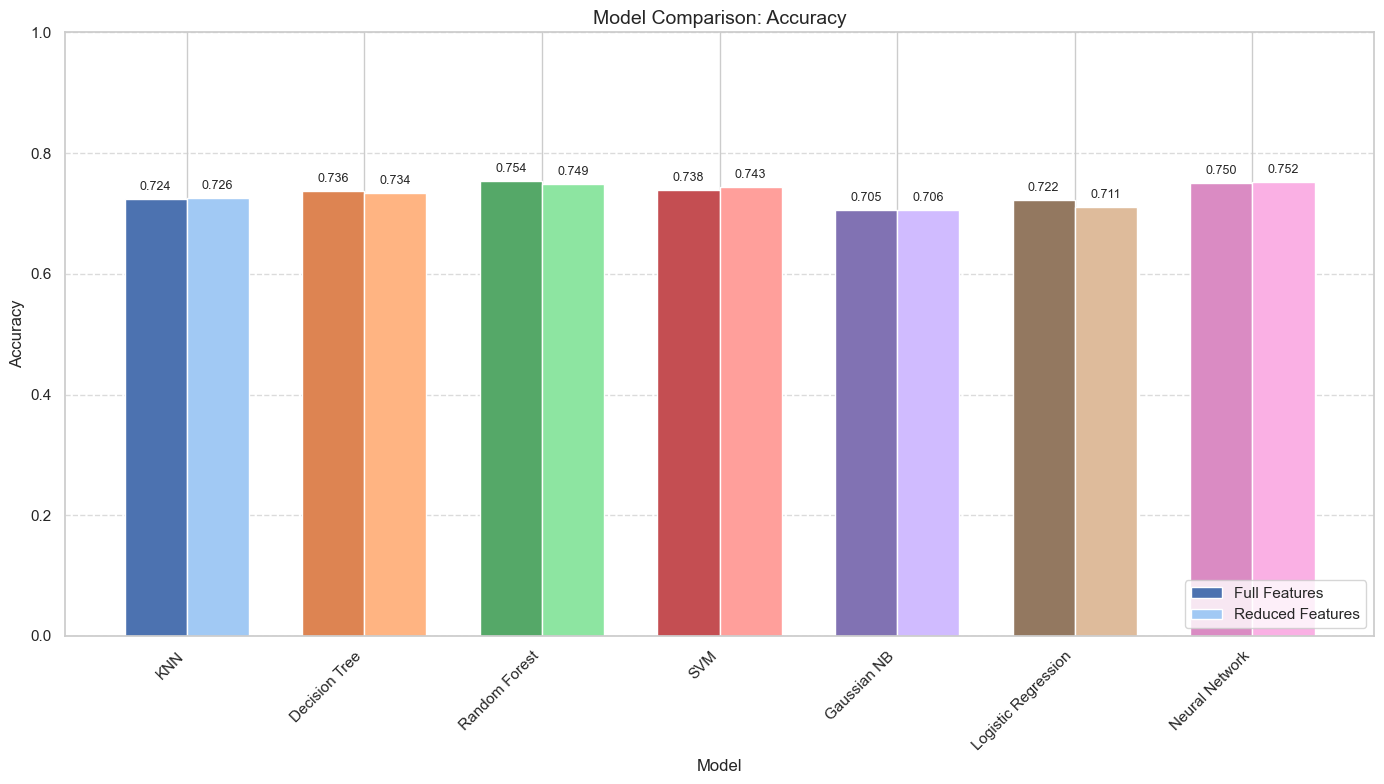

Best model for Accuracy: Random Forest with Full Feature Set (Score: 0.7538)

Comparing models based on Precision:


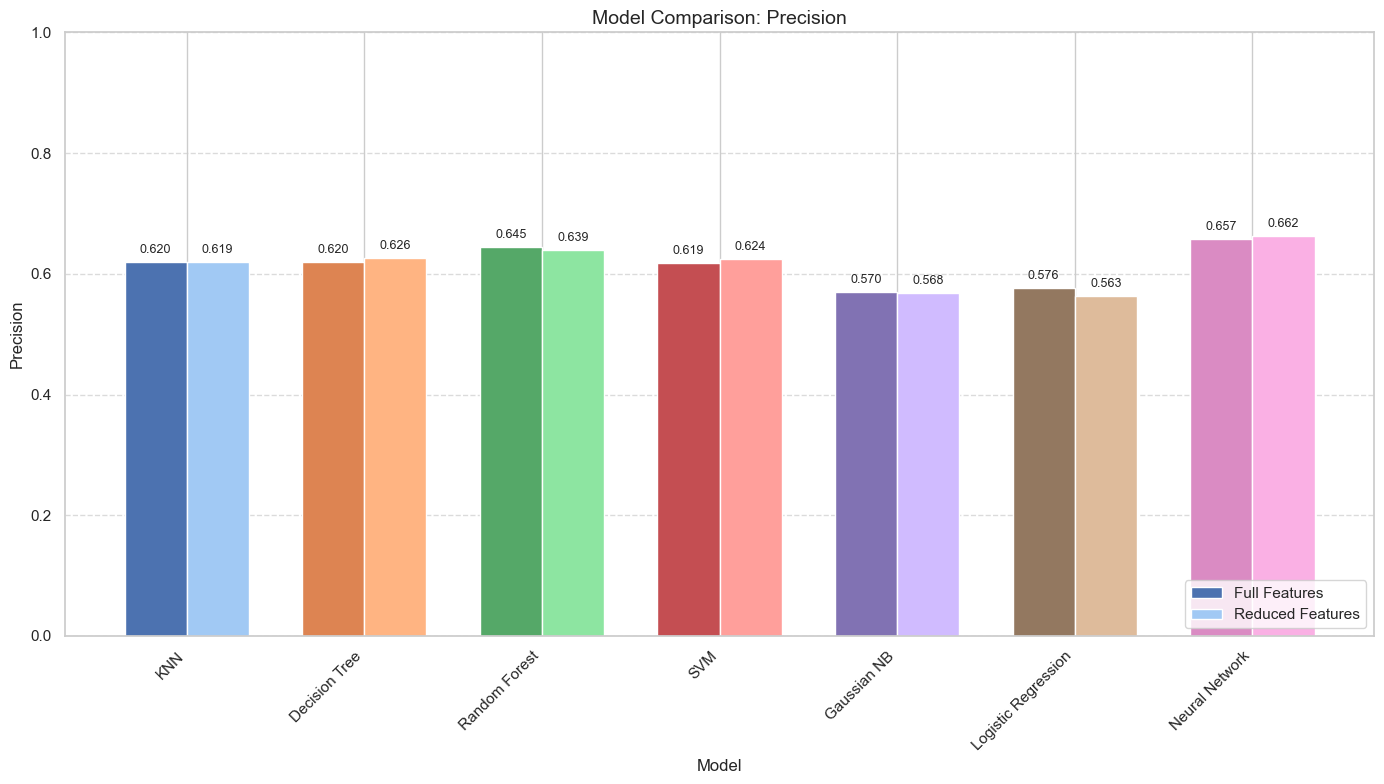

Best model for Precision: Neural Network with Reduced Feature Set (Score: 0.6621)

Comparing models based on Recall:


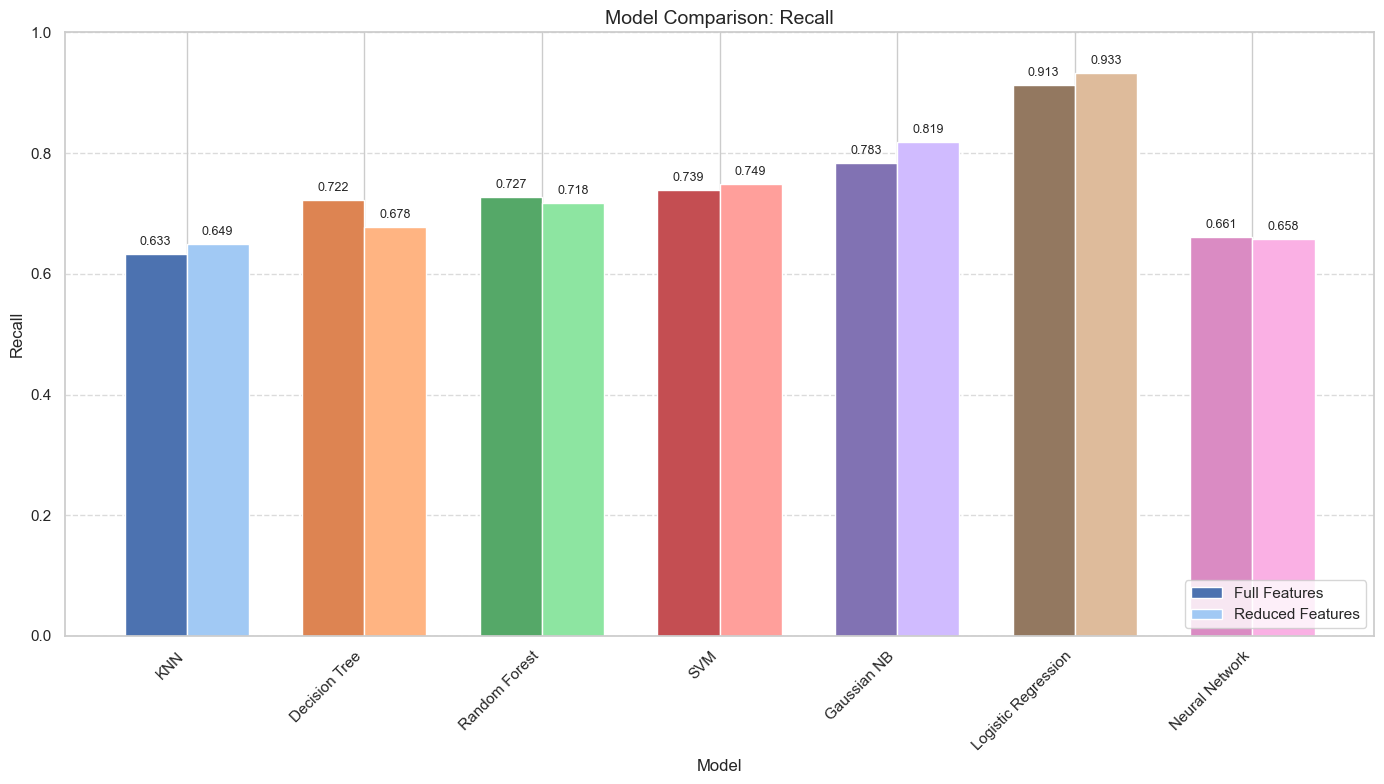

Best model for Recall: Logistic Regression with Reduced Feature Set (Score: 0.9327)

Comparing models based on F1_Score:


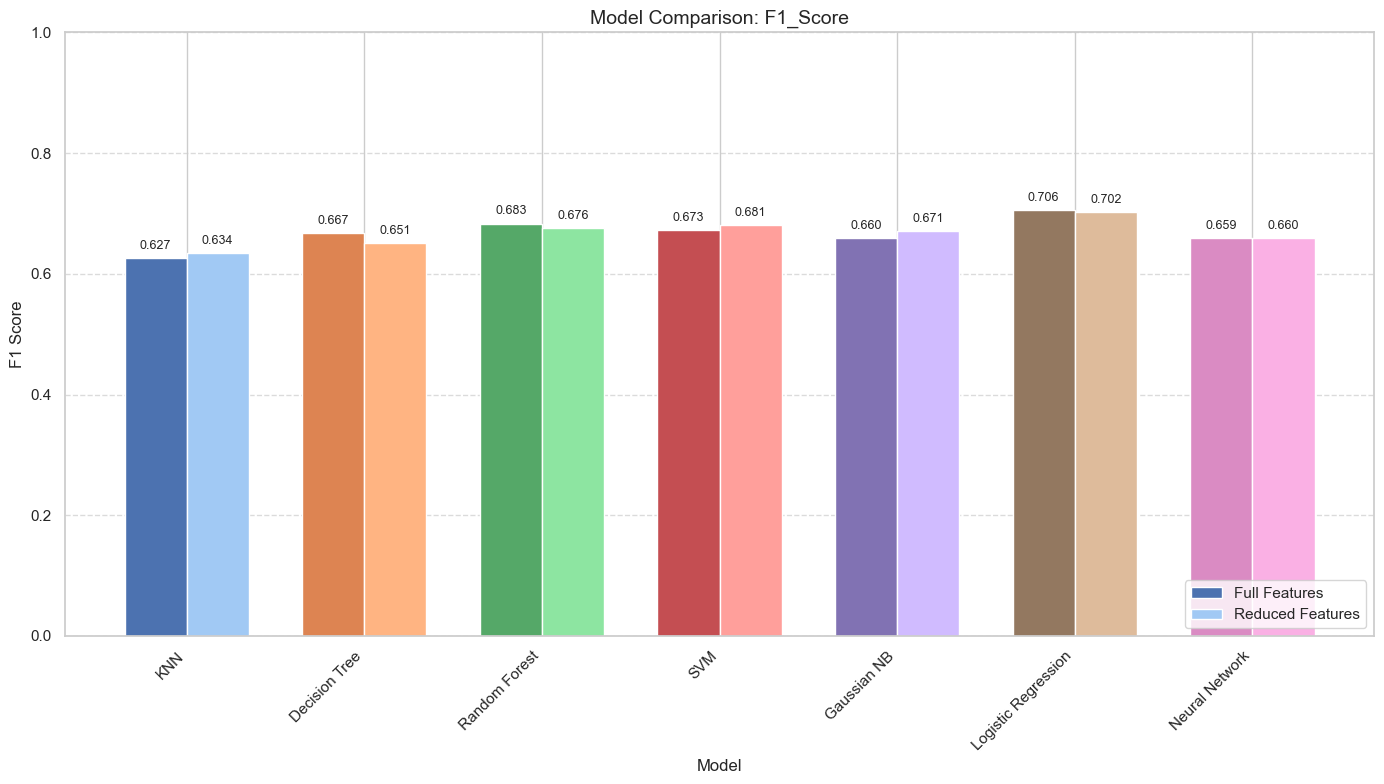

Best model for F1_Score: Logistic Regression with Full Feature Set (Score: 0.7061)

Comparing models based on ROC_AUC:


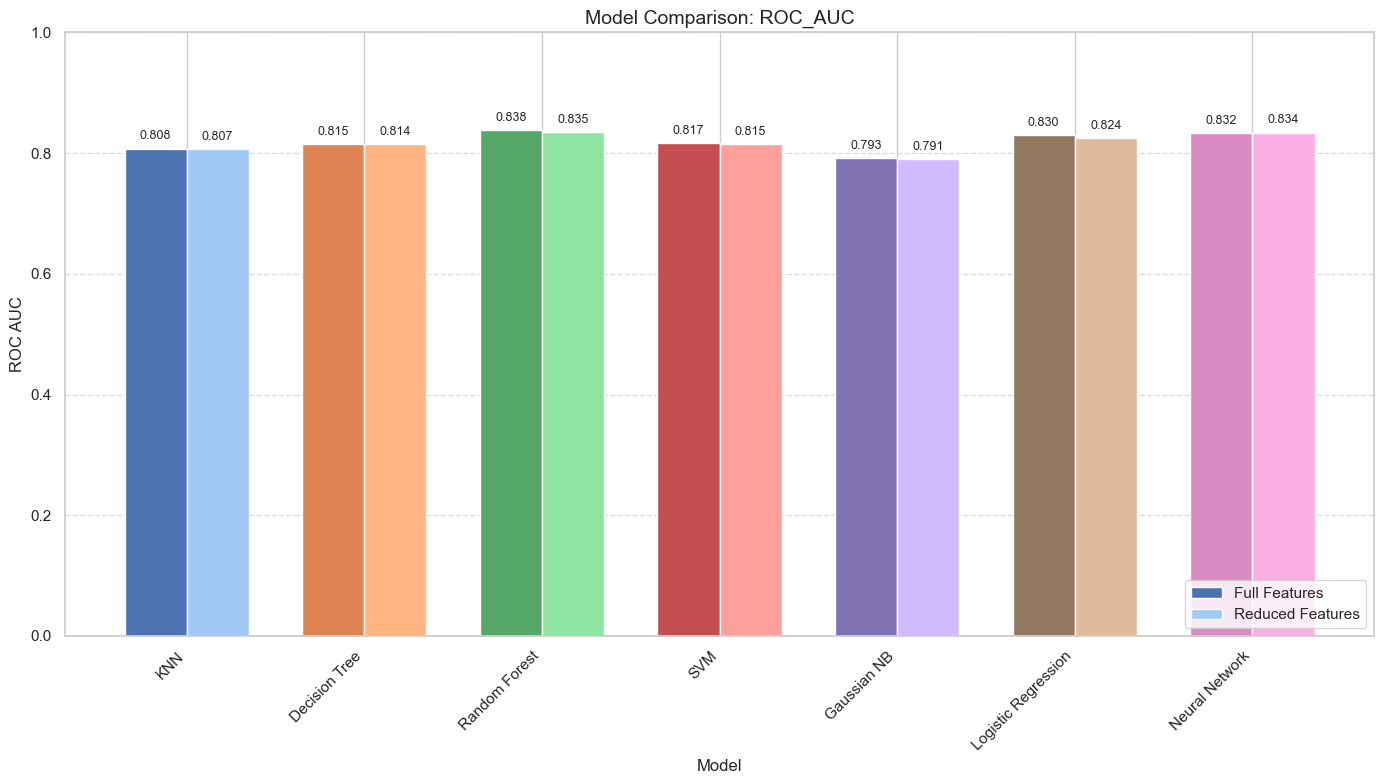

Best model for ROC_AUC: Random Forest with Full Feature Set (Score: 0.8385)


In [5]:
# Plot comparisons for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
best_models = {}

for metric in metrics:
    print(f"\nComparing models based on {metric}:")
    best_model, feature_set, score = plot_metric_comparison(
        combined_results, 
        metric, 
        f'Model Comparison: {metric}',
        y_label=metric.replace('_', ' ')
    )
    best_models[metric] = (best_model, feature_set, score)
    print(f"Best model for {metric}: {best_model} with {feature_set} Feature Set (Score: {score:.4f})")

## 3. Feature Set Comparison

Now let's analyze the impact of using the reduced feature set compared to the full feature set across all models.

In [6]:
# Calculate average performance difference between full and reduced feature sets
feature_comparison = []

for model in combined_results['Model'].unique():
    model_full = combined_results[(combined_results['Model'] == model) & (combined_results['Feature_Set'] == 'Full')]
    model_reduced = combined_results[(combined_results['Model'] == model) & (combined_results['Feature_Set'] == 'Reduced')]
    
    if not model_full.empty and not model_reduced.empty:
        for metric in metrics:
            full_value = model_full[metric].values[0]
            reduced_value = model_reduced[metric].values[0]
            abs_diff = full_value - reduced_value
            pct_diff = (abs_diff / full_value) * 100 if full_value != 0 else 0
            
            feature_comparison.append({
                'Model': model,
                'Metric': metric,
                'Full_Value': full_value,
                'Reduced_Value': reduced_value,
                'Absolute_Difference': abs_diff,
                'Percentage_Difference': pct_diff
            })

# Convert to DataFrame
feature_diff_df = pd.DataFrame(feature_comparison)

# Display the differences
feature_diff_df

,Model,Metric,Full_Value,Reduced_Value,Absolute_Difference,Percentage_Difference
0,KNN,Accuracy,0.724169,0.725644,-0.001474,-0.203602
1,KNN,Precision,0.619988,0.618752,0.001236,0.199359
2,KNN,Recall,0.633457,0.649286,-0.015829,-2.498775
3,KNN,F1_Score,0.626650,0.633651,-0.007001,-1.117223
4,KNN,ROC_AUC,0.807513,0.807133,0.000380,0.047080
5,Decision Tree,Accuracy,0.736418,0.734377,0.002042,0.277222
6,Decision Tree,Precision,0.619670,0.626074,-0.006405,-1.033614
7,Decision Tree,Recall,0.721601,0.678150,0.043451,6.021505
8,Decision Tree,F1_Score,0.666762,0.651073,0.015690,2.353096
9,Decision Tree,ROC_AUC,0.815335,0.814366,0.000969,0.118869


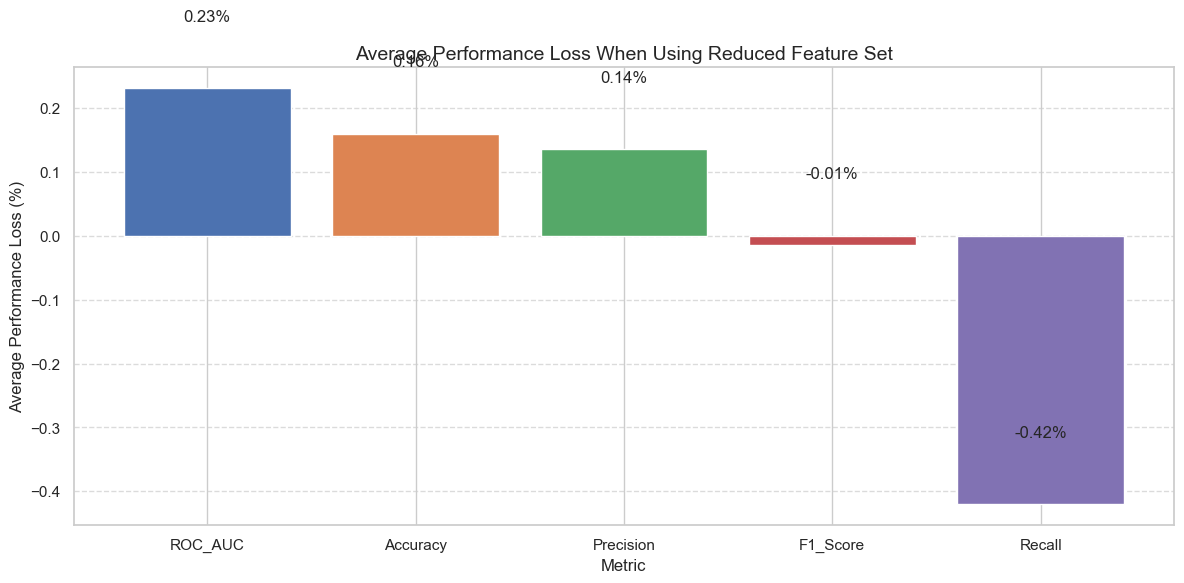

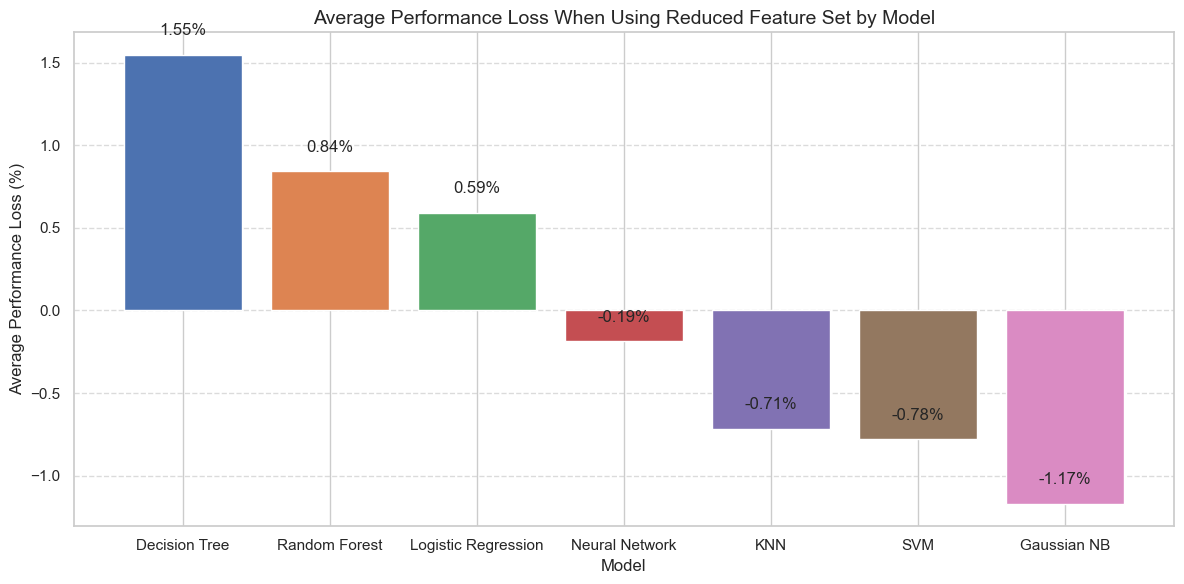

In [7]:
# Calculate average percentage difference across all models for each metric
avg_diff_by_metric = feature_diff_df.groupby('Metric')['Percentage_Difference'].mean().reset_index()
avg_diff_by_metric = avg_diff_by_metric.sort_values(by='Percentage_Difference', ascending=False)

# Plot average performance loss by metric
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_diff_by_metric['Metric'], avg_diff_by_metric['Percentage_Difference'], color=sns.color_palette("deep"))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Performance Loss (%)', fontsize=12)
plt.title('Average Performance Loss When Using Reduced Feature Set', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate average percentage difference across all metrics for each model
avg_diff_by_model = feature_diff_df.groupby('Model')['Percentage_Difference'].mean().reset_index()
avg_diff_by_model = avg_diff_by_model.sort_values(by='Percentage_Difference', ascending=False)

# Plot average performance loss by model
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_diff_by_model['Model'], avg_diff_by_model['Percentage_Difference'], color=sns.color_palette("deep"))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Performance Loss (%)', fontsize=12)
plt.title('Average Performance Loss When Using Reduced Feature Set by Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Ranking Models by Overall Performance

Let's create a comprehensive ranking of models based on their average performance across all metrics:

In [8]:
# Create a normalized score for each model across all metrics
# This will give us a fair comparison regardless of metric scale

# First, get the maximum value for each metric to normalize
max_values = {}
for metric in metrics:
    max_values[metric] = combined_results[metric].max()

# Calculate normalized scores and aggregate by model and feature set
model_scores = []

for index, row in combined_results.iterrows():
    model = row['Model']
    feature_set = row['Feature_Set']
    
    # Calculate normalized score for each metric
    normalized_scores = {}
    for metric in metrics:
        if max_values[metric] > 0:  # Avoid division by zero
            normalized_scores[metric] = row[metric] / max_values[metric]
        else:
            normalized_scores[metric] = 0
    
    # Calculate average normalized score
    avg_score = sum(normalized_scores.values()) / len(normalized_scores)
    
    model_scores.append({
        'Model': model,
        'Feature_Set': feature_set,
        'Average_Normalized_Score': avg_score,
        **{f'{metric}_Normalized': normalized_scores[metric] for metric in metrics}
    })

# Convert to DataFrame and sort by score
model_ranking = pd.DataFrame(model_scores)
model_ranking = model_ranking.sort_values('Average_Normalized_Score', ascending=False).reset_index(drop=True)

# Display the ranking
model_ranking[['Model', 'Feature_Set', 'Average_Normalized_Score']]

,Model,Feature_Set,Average_Normalized_Score
0,Logistic Regression,Full,0.959358
1,Logistic Regression,Reduced,0.954084
2,Random Forest,Full,0.944144
3,Random Forest,Reduced,0.936388
4,SVM,Reduced,0.933650
5,SVM,Full,0.926665
6,Neural Network,Reduced,0.926593
7,Neural Network,Full,0.924518
8,Decision Tree,Full,0.920664
9,Gaussian NB,Reduced,0.913271


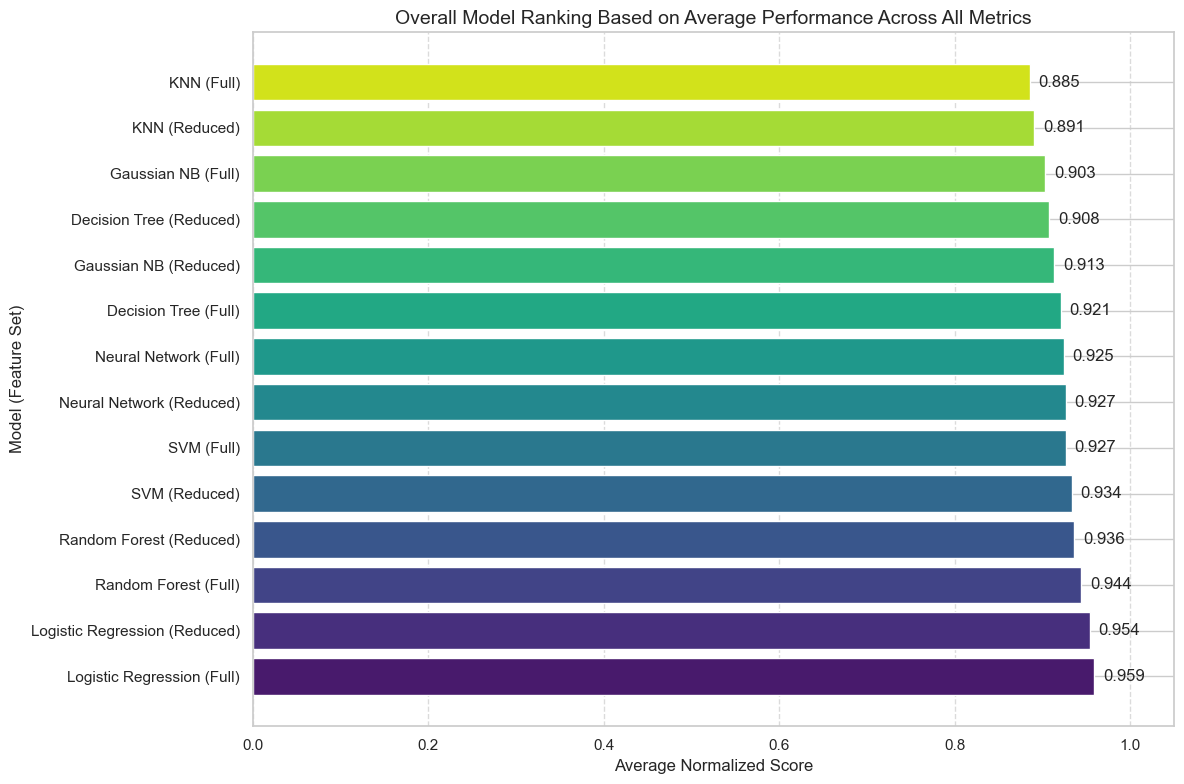

In [9]:
# Visualize model ranking
plt.figure(figsize=(12, 8))

# Create a new column combining model and feature set for better display
model_ranking['Model_Feature'] = model_ranking['Model'] + ' (' + model_ranking['Feature_Set'] + ')'

# Plot the ranking
bars = plt.barh(model_ranking['Model_Feature'], model_ranking['Average_Normalized_Score'], 
               color=sns.color_palette("viridis", len(model_ranking)))

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
            va='center', ha='left')

plt.xlabel('Average Normalized Score', fontsize=12)
plt.ylabel('Model (Feature Set)', fontsize=12)
plt.title('Overall Model Ranking Based on Average Performance Across All Metrics', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim([0, 1.05])
plt.tight_layout()
plt.show()

## 5. Detailed Performance Analysis of Top Models

Let's take a closer look at the performance of the top-performing models across all metrics:

In [10]:
# Get top 3 models from ranking
top_models = model_ranking.head(3)[['Model', 'Feature_Set']].values.tolist()
print("Top 3 Models:")
for i, (model, feature_set) in enumerate(top_models, 1):
    print(f"{i}. {model} with {feature_set} Feature Set")

# Create a dataframe with detailed metrics for the top models
top_model_metrics = pd.DataFrame()
for model, feature_set in top_models:
    model_data = combined_results[(combined_results['Model'] == model) & 
                                 (combined_results['Feature_Set'] == feature_set)]
    if not model_data.empty:
        top_model_metrics = pd.concat([top_model_metrics, model_data], ignore_index=True)

# Display detailed metrics
top_model_metrics[['Model', 'Feature_Set', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']]

Top 3 Models:
1. Logistic Regression with Full Feature Set
2. Logistic Regression with Reduced Feature Set
3. Random Forest with Full Feature Set


,Model,Feature_Set,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,Full,0.722241,0.575621,0.913097,0.706108,0.830229
1,Logistic Regression,Reduced,0.710673,0.562839,0.932651,0.702021,0.824445
2,Random Forest,Full,0.753771,0.644646,0.726878,0.683297,0.838461


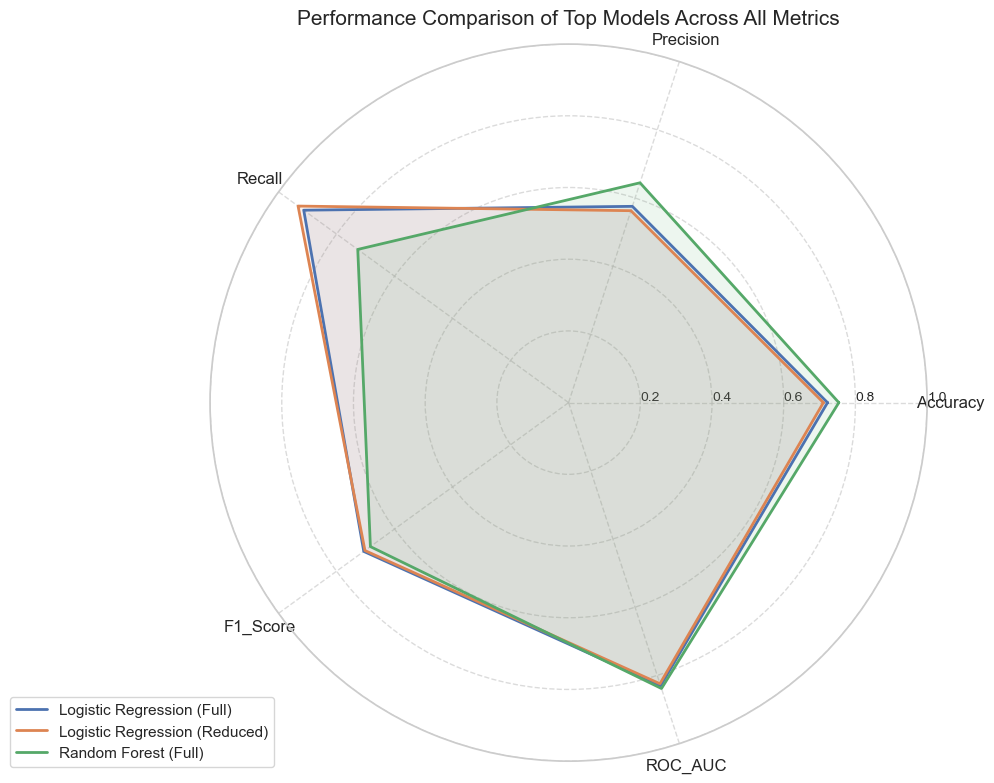

In [11]:
# Create a radar chart to visualize performance across all metrics for top models
def create_radar_chart(df, metrics):
    # Number of variables
    N = len(metrics)
    
    # Create angles for each metric (evenly spaced)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the polygon
    
    # Initialize the figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], metrics, fontsize=12)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=10)
    plt.ylim(0, 1)
    
    # Plot each model
    for i, row in df.iterrows():
        model_name = f"{row['Model']} ({row['Feature_Set']})"
        values = [row[metric] for metric in metrics]
        values += values[:1]  # Close the polygon
        
        # Plot values and fill area
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name)
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Performance Comparison of Top Models Across All Metrics', fontsize=15)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Create radar chart for top models
create_radar_chart(top_model_metrics, metrics)

## 6. Practical Implementation Considerations

Beyond pure performance metrics, there are other important factors to consider when selecting a model for real-world implementation:

In [12]:
# Create a table summarizing practical considerations for each model type
practical_considerations = pd.DataFrame([
    {'Model': 'KNN', 'Interpretability': 'Medium', 'Training_Speed': 'Fast', 'Prediction_Speed': 'Slow for large datasets', 'Memory_Usage': 'High (stores all training data)', 'Hyperparameter_Sensitivity': 'Medium'},
    {'Model': 'Decision Tree', 'Interpretability': 'High', 'Training_Speed': 'Fast', 'Prediction_Speed': 'Very Fast', 'Memory_Usage': 'Low', 'Hyperparameter_Sensitivity': 'High'},
    {'Model': 'Random Forest', 'Interpretability': 'Medium', 'Training_Speed': 'Medium', 'Prediction_Speed': 'Fast', 'Memory_Usage': 'Medium', 'Hyperparameter_Sensitivity': 'Medium'},
    {'Model': 'SVM', 'Interpretability': 'Low', 'Training_Speed': 'Slow for large datasets', 'Prediction_Speed': 'Medium', 'Memory_Usage': 'Medium', 'Hyperparameter_Sensitivity': 'High'},
    {'Model': 'Naive Bayes', 'Interpretability': 'Medium-High', 'Training_Speed': 'Very Fast', 'Prediction_Speed': 'Very Fast', 'Memory_Usage': 'Low', 'Hyperparameter_Sensitivity': 'Low'},
    {'Model': 'Logistic Regression', 'Interpretability': 'High', 'Training_Speed': 'Fast', 'Prediction_Speed': 'Very Fast', 'Memory_Usage': 'Low', 'Hyperparameter_Sensitivity': 'Low'},
    {'Model': 'Neural Network', 'Interpretability': 'Very Low', 'Training_Speed': 'Slow', 'Prediction_Speed': 'Fast', 'Memory_Usage': 'Medium', 'Hyperparameter_Sensitivity': 'Very High'}
])

# Display the table
practical_considerations.set_index('Model')

,Interpretability,Training_Speed,Prediction_Speed,Memory_Usage,Hyperparameter_Sensitivity
Model,,,,,
KNN,Medium,Fast,Slow for large datasets,High (stores all training data),Medium
Decision Tree,High,Fast,Very Fast,Low,High
Random Forest,Medium,Medium,Fast,Medium,Medium
SVM,Low,Slow for large datasets,Medium,Medium,High
Naive Bayes,Medium-High,Very Fast,Very Fast,Low,Low
Logistic Regression,High,Fast,Very Fast,Low,Low
Neural Network,Very Low,Slow,Fast,Medium,Very High


## 7. Conclusion and Future Work

### Potential Applications

The models developed in this project have several potential real-world applications:

1. **Healthcare Screening**: Assisting healthcare providers in identifying potential smokers who might not disclose their habit, enabling earlier intervention.

2. **Insurance Risk Assessment**: Providing more accurate risk profiles for insurance premium calculations based on objective health indicators.

3. **Public Health Research**: Enabling researchers to study smoking prevalence and health impacts using routinely collected health data.

4. **Personalized Preventive Care**: Supporting the development of targeted interventions for individuals at high risk of smoking-related health issues.

### Future Work

Several avenues for future research and improvement emerge from this analysis:

1. **Ensemble Methods**: Combining predictions from multiple models could potentially improve performance further, particularly by leveraging the different strengths of each model.

2. **Advanced Feature Engineering**: Exploring more complex relationships between health indicators through feature interactions and transformations might reveal additional predictive patterns.

3. **Temporal Validation**: Testing the models on data collected over time would help assess their stability and generalizability as health patterns evolve.

4. **Demographic Subgroup Analysis**: Evaluating model performance across different demographic groups would ensure fairness and identify potential biases.

5. **Explainable AI Techniques**: Applying methods to enhance the interpretability of the more complex models would make them more suitable for healthcare applications.

This project demonstrates the power of machine learning in extracting valuable insights from health data, potentially contributing to more effective smoking detection and intervention strategies.